<a href="https://colab.research.google.com/github/namyaagrawal03/Insurance_fraud/blob/main/insurance_fraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount("/content/drive")
df=pd.read_csv("/content/drive/MyDrive/fraud_oracle.csv")

Mounted at /content/drive


In [3]:
df.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


In [4]:
df.describe()

,WeekOfMonth,WeekOfMonthClaimed,Age,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Year
count,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000
mean,2.788586,2.693969,39.855707,0.059857,7710.500000,8.483268,407.704280,2.487808,1994.866472
std,1.287585,1.259115,13.492377,0.237230,4451.514911,4.599948,43.950998,1.119453,0.803313
min,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,300.000000,1.000000,1994.000000
25%,2.000000,2.000000,31.000000,0.000000,3855.750000,5.000000,400.000000,1.000000,1994.000000
50%,3.000000,3.000000,38.000000,0.000000,7710.500000,8.000000,400.000000,2.000000,1995.000000
75%,4.000000,4.000000,48.000000,0.000000,11565.250000,12.000000,400.000000,3.000000,1996.000000
max,5.000000,5.000000,80.000000,1.000000,15420.000000,16.000000,700.000000,4.000000,1996.000000


In [5]:
len(df.columns)

33

In [6]:
df.columns

Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'FraudFound_P', 'PolicyNumber', 'RepNumber',
       'Deductible', 'DriverRating', 'Days_Policy_Accident',
       'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle',
       'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'Year',
       'BasePolicy'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  FraudFound_P          15420 non-null

In [8]:
#we can remove irrelevant data
#23 remaining
#removed ageofpolicyholder since we have two age columns
#removed fault
#removed 'AddressChange_Claim','Year','VehicleCategory','BasePolicy'
#18 remaining
df=df[['Make','AccidentArea', 'Sex','Age',
       'MaritalStatus', 'PolicyType',
       'VehiclePrice',  'Deductible', 'DriverRating', 'PastNumberOfClaims', 'AgeOfVehicle', 'PoliceReportFiled', 'WitnessPresent', 'AgentType',
         'NumberOfCars',
        'FraudFound_P']]
#'NumberOfSuppliments',

In [9]:
df.shape

(15420, 16)

In [10]:
df.head()

,Make,AccidentArea,Sex,Age,MaritalStatus,PolicyType,VehiclePrice,Deductible,DriverRating,PastNumberOfClaims,AgeOfVehicle,PoliceReportFiled,WitnessPresent,AgentType,NumberOfCars,FraudFound_P
0,Honda,Urban,Female,21,Single,Sport - Liability,more than 69000,300,1,none,3 years,No,No,External,3 to 4,0
1,Honda,Urban,Male,34,Single,Sport - Collision,more than 69000,400,4,none,6 years,Yes,No,External,1 vehicle,0
2,Honda,Urban,Male,47,Married,Sport - Collision,more than 69000,400,3,1,7 years,No,No,External,1 vehicle,0
3,Toyota,Rural,Male,65,Married,Sedan - Liability,20000 to 29000,400,2,1,more than 7,Yes,No,External,1 vehicle,0
4,Honda,Urban,Female,27,Single,Sport - Collision,more than 69000,400,1,none,5 years,No,No,External,1 vehicle,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Make                15420 non-null  object
 1   AccidentArea        15420 non-null  object
 2   Sex                 15420 non-null  object
 3   Age                 15420 non-null  int64 
 4   MaritalStatus       15420 non-null  object
 5   PolicyType          15420 non-null  object
 6   VehiclePrice        15420 non-null  object
 7   Deductible          15420 non-null  int64 
 8   DriverRating        15420 non-null  int64 
 9   PastNumberOfClaims  15420 non-null  object
 10  AgeOfVehicle        15420 non-null  object
 11  PoliceReportFiled   15420 non-null  object
 12  WitnessPresent      15420 non-null  object
 13  AgentType           15420 non-null  object
 14  NumberOfCars        15420 non-null  object
 15  FraudFound_P        15420 non-null  int64 
dtypes: int64(4), object(12

In [12]:
df.columns

Index(['Make', 'AccidentArea', 'Sex', 'Age', 'MaritalStatus', 'PolicyType',
       'VehiclePrice', 'Deductible', 'DriverRating', 'PastNumberOfClaims',
       'AgeOfVehicle', 'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfCars', 'FraudFound_P'],
      dtype='object')

In [13]:
correlation_matrix = df.corr()

<ipython-input-13-68bbfff3c4eb>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


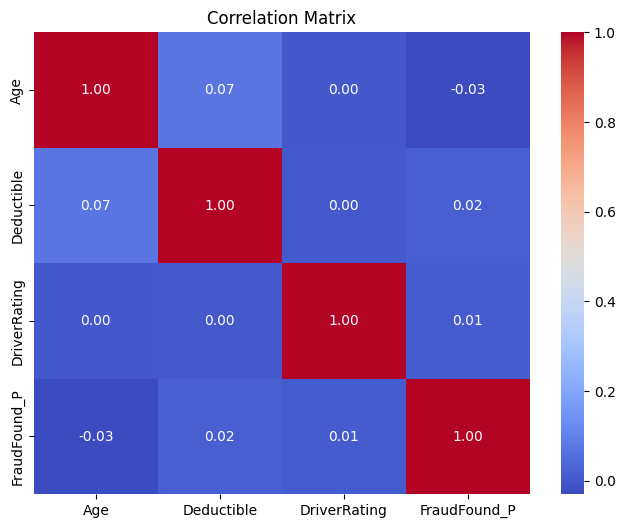

In [14]:
#correlation between numerical features
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [15]:
#no correlation found among features with numerical data

In [16]:
#correlation between categorical data

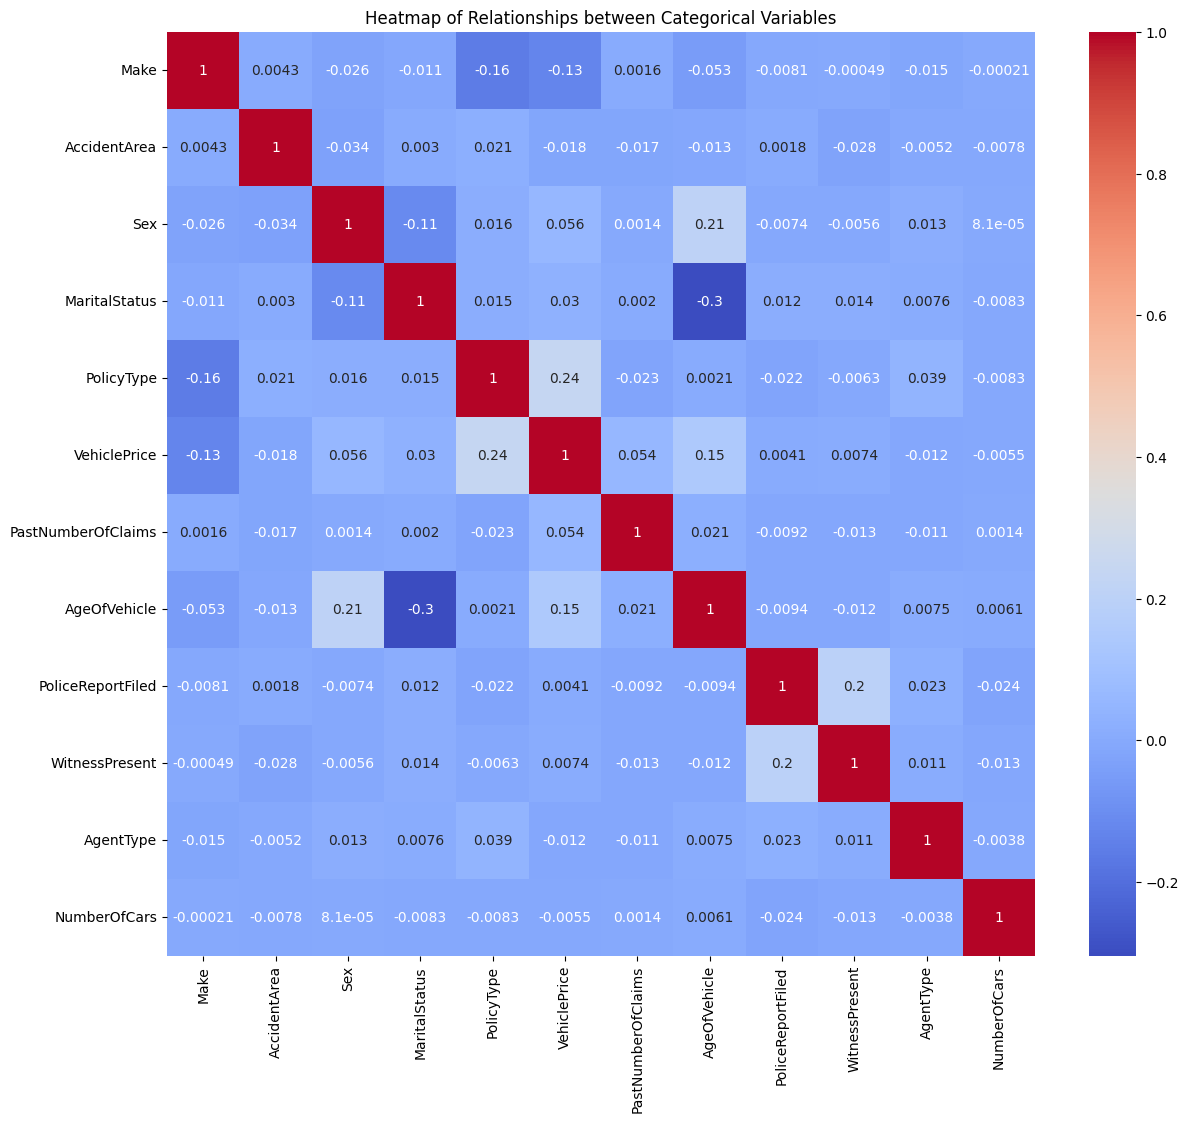

In [17]:
categorical_df = df.select_dtypes(include=['object'])
corr_matrix = categorical_df.apply(lambda x: x.astype('category').cat.codes).corr()
plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Heatmap of Relationships between Categorical Variables')
plt.show()


In [18]:
#removed 'VehicleCategory','BasePolicy'
#due to high correlation with Policy type

In [19]:
print('Out of all % of records not commited fraud==> ',len(df[df['FraudFound_P']==0])/len(df)*100)
print('Out of all % of records commited fraud==> ',len(df[df['FraudFound_P']==1])/len(df)*100)

# we have highly unbalanced  data

Out of all % of records not commited fraud==>  94.01426718547341
Out of all % of records commited fraud==>  5.985732814526589


In [20]:
#oversampling

from sklearn.utils import resample

oversamp=resample(df[df['FraudFound_P']==1],
                 replace=True,
                 n_samples=len(df[df['FraudFound_P']==0]),
                 random_state=30)
df=pd.concat([oversamp, df[df['FraudFound_P']==0]])

In [21]:
print('Out of all % of records not commited fraud==> ',len(df[df['FraudFound_P']==0])/len(df)*100)
print('Out of all % of records commited fraud==> ',len(df[df['FraudFound_P']==1])/len(df)*100)

Out of all % of records not commited fraud==>  50.0
Out of all % of records commited fraud==>  50.0


In [22]:
x=df.drop('FraudFound_P', axis=1 )
y=df['FraudFound_P']

In [23]:
x.shape

(28994, 15)

In [24]:
x.columns

Index(['Make', 'AccidentArea', 'Sex', 'Age', 'MaritalStatus', 'PolicyType',
       'VehiclePrice', 'Deductible', 'DriverRating', 'PastNumberOfClaims',
       'AgeOfVehicle', 'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfCars'],
      dtype='object')

In [25]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28994 entries, 13241 to 15418
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Make                28994 non-null  object
 1   AccidentArea        28994 non-null  object
 2   Sex                 28994 non-null  object
 3   Age                 28994 non-null  int64 
 4   MaritalStatus       28994 non-null  object
 5   PolicyType          28994 non-null  object
 6   VehiclePrice        28994 non-null  object
 7   Deductible          28994 non-null  int64 
 8   DriverRating        28994 non-null  int64 
 9   PastNumberOfClaims  28994 non-null  object
 10  AgeOfVehicle        28994 non-null  object
 11  PoliceReportFiled   28994 non-null  object
 12  WitnessPresent      28994 non-null  object
 13  AgentType           28994 non-null  object
 14  NumberOfCars        28994 non-null  object
dtypes: int64(3), object(12)
memory usage: 3.5+ MB


In [26]:
x.nunique()

Make                  19
AccidentArea           2
Sex                    2
Age                   66
MaritalStatus          4
PolicyType             9
VehiclePrice           6
Deductible             4
DriverRating           4
PastNumberOfClaims     4
AgeOfVehicle           8
PoliceReportFiled      2
WitnessPresent         2
AgentType              2
NumberOfCars           5
dtype: int64

In [27]:
x.tail()

,Make,AccidentArea,Sex,Age,MaritalStatus,PolicyType,VehiclePrice,Deductible,DriverRating,PastNumberOfClaims,AgeOfVehicle,PoliceReportFiled,WitnessPresent,AgentType,NumberOfCars
15411,Honda,Rural,Male,42,Married,Sedan - All Perils,less than 20000,400,1,1,7 years,No,No,External,1 vehicle
15413,Mazda,Urban,Male,40,Married,Sedan - Liability,20000 to 29000,400,2,1,7 years,Yes,No,External,1 vehicle
15414,Chevrolet,Urban,Male,58,Single,Sedan - Collision,30000 to 39000,400,4,none,7 years,No,No,External,2 vehicles
15416,Pontiac,Urban,Male,30,Married,Sedan - Liability,30000 to 39000,400,3,more than 4,6 years,No,No,External,3 to 4
15418,Toyota,Urban,Female,34,Married,Sedan - All Perils,20000 to 29000,400,4,none,2 years,No,No,External,1 vehicle


In [28]:
#one hot encoding
categorical_cols = x.select_dtypes(include =['object'])
categorical_cols= pd.get_dummies(categorical_cols, drop_first= True)
categorical_cols.head()

,Make_BMW,Make_Chevrolet,Make_Dodge,Make_Ferrari,Make_Ford,Make_Honda,Make_Jaguar,Make_Lexus,Make_Mazda,Make_Mecedes,...,AgeOfVehicle_7 years,AgeOfVehicle_more than 7,AgeOfVehicle_new,PoliceReportFiled_Yes,WitnessPresent_Yes,AgentType_Internal,NumberOfCars_2 vehicles,NumberOfCars_3 to 4,NumberOfCars_5 to 8,NumberOfCars_more than 8
13241,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
6300,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
13425,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7618,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2167,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [29]:
numerical_col=x.select_dtypes(include= ['int64'])
x=pd.concat([numerical_col, categorical_cols], axis=1)

In [44]:
numerical_col.head()

,Age,Deductible,DriverRating
13241,30,400,3
6300,37,400,1
13425,30,400,1
7618,28,400,1
2167,55,400,2


In [30]:
x.head()

,Age,Deductible,DriverRating,Make_BMW,Make_Chevrolet,Make_Dodge,Make_Ferrari,Make_Ford,Make_Honda,Make_Jaguar,...,AgeOfVehicle_7 years,AgeOfVehicle_more than 7,AgeOfVehicle_new,PoliceReportFiled_Yes,WitnessPresent_Yes,AgentType_Internal,NumberOfCars_2 vehicles,NumberOfCars_3 to 4,NumberOfCars_5 to 8,NumberOfCars_more than 8
13241,30,400,3,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
6300,37,400,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
13425,30,400,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7618,28,400,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2167,55,400,2,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [31]:
x.shape

(28994, 56)

In [32]:
#kaggle wale ke according split and apply model
#youtube video ke according bhi same

In [33]:
from sklearn.model_selection import train_test_split
x_train, x_test , y_train, y_test =train_test_split(x, y, test_size=0.2, random_state=13)

In [34]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

In [35]:
x_train[[ 'Age','Deductible',  'DriverRating']]=scaler.fit_transform(x_train[['Age','Deductible', 'DriverRating']])
x_test[[ 'Age', 'Deductible',  'DriverRating']]=scaler.transform(x_test[['Age', 'Deductible',  'DriverRating']])

In [36]:
x_train.head()

,Age,Deductible,DriverRating,Make_BMW,Make_Chevrolet,Make_Dodge,Make_Ferrari,Make_Ford,Make_Honda,Make_Jaguar,...,AgeOfVehicle_7 years,AgeOfVehicle_more than 7,AgeOfVehicle_new,PoliceReportFiled_Yes,WitnessPresent_Yes,AgentType_Internal,NumberOfCars_2 vehicles,NumberOfCars_3 to 4,NumberOfCars_5 to 8,NumberOfCars_more than 8
13946,0.498818,-0.199668,-1.338942,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
9928,-0.533922,-0.199668,0.445212,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3338,1.310257,-0.199668,1.337288,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
14808,-0.976525,-0.199668,-1.338942,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1476,-0.238854,-0.199668,-0.446865,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0


In [37]:
'''from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred2= knn.predict(x_test)
print("knn_model_train_acc: ", accuracy_score(y_train, knn.predict(x_train)))
print("knn_model_test_acc: ", accuracy_score( y_test, y_pred2))'''

'from sklearn.neighbors import KNeighborsClassifier\nknn= KNeighborsClassifier()\nknn.fit(x_train, y_train)\ny_pred2= knn.predict(x_test)\nprint("knn_model_train_acc: ", accuracy_score(y_train, knn.predict(x_train)))\nprint("knn_model_test_acc: ", accuracy_score( y_test, y_pred2))'

In [38]:
'''from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(x_train, y_train)
y_pred3= dtc.predict(x_test)
print("dtc_model_train_acc: ", accuracy_score(y_train, dtc.predict(x_train)))
print("dtc_model_test_acc: ", accuracy_score( y_test, y_pred3))'''

'from sklearn.tree import DecisionTreeClassifier\ndtc=DecisionTreeClassifier()\ndtc.fit(x_train, y_train)\ny_pred3= dtc.predict(x_test)\nprint("dtc_model_train_acc: ", accuracy_score(y_train, dtc.predict(x_train)))\nprint("dtc_model_test_acc: ", accuracy_score( y_test, y_pred3))'

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import accuracy_score
rfc=RandomForestClassifier()
rfc.fit(x_train, y_train)
y_pred4= rfc.predict(x_test)
print("rfc_model_train_acc: ", accuracy_score(y_train, rfc.predict(x_train)))
print("rfc_model_test_acc: ", accuracy_score( y_test, y_pred4))



rfc_model_train_acc:  0.9958180642379824
rfc_model_test_acc:  0.983445421624418


In [40]:
'''from sklearn.ensemble import VotingClassifier
classifiers=[('knn', knn),('dtc', dtc), ('rfc', rfc)]
vc=VotingClassifier(estimators = classifiers)
vc.fit(x_train, y_train)
y_pred5= vc.predict(x_test)
print("vc_model_train_acc: ", accuracy_score(y_train, vc.predict(x_train)))
print("vc_model_test_acc: ", accuracy_score( y_test, y_pred5))
'''

'from sklearn.ensemble import VotingClassifier\nclassifiers=[(\'knn\', knn),(\'dtc\', dtc), (\'rfc\', rfc)]\nvc=VotingClassifier(estimators = classifiers)\nvc.fit(x_train, y_train)\ny_pred5= vc.predict(x_test)\nprint("vc_model_train_acc: ", accuracy_score(y_train, vc.predict(x_train)))\nprint("vc_model_test_acc: ", accuracy_score( y_test, y_pred5))\n'

In [41]:
k_folds = KFold(n_splits = 10)
scores = cross_val_score(rfc, x, y, cv = k_folds)

In [42]:
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())

Cross Validation Scores:  [1.         1.         1.         1.         1.         0.95446706
 0.96412556 0.96619524 0.96585029 0.96964471]
Average CV Score:  0.9820282856157295


In [43]:
import joblib
drive.mount('/content/drive')
joblib.dump(rfc, '/content/drive/MyDrive/Colab Notebooks/trained_model.pkl')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


['/content/drive/MyDrive/Colab Notebooks/trained_model.pkl']